In [3]:
import numpy as np
import pandas as pd
df=pd.read_excel('heatmap_data.xlsx')
df.head()

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes


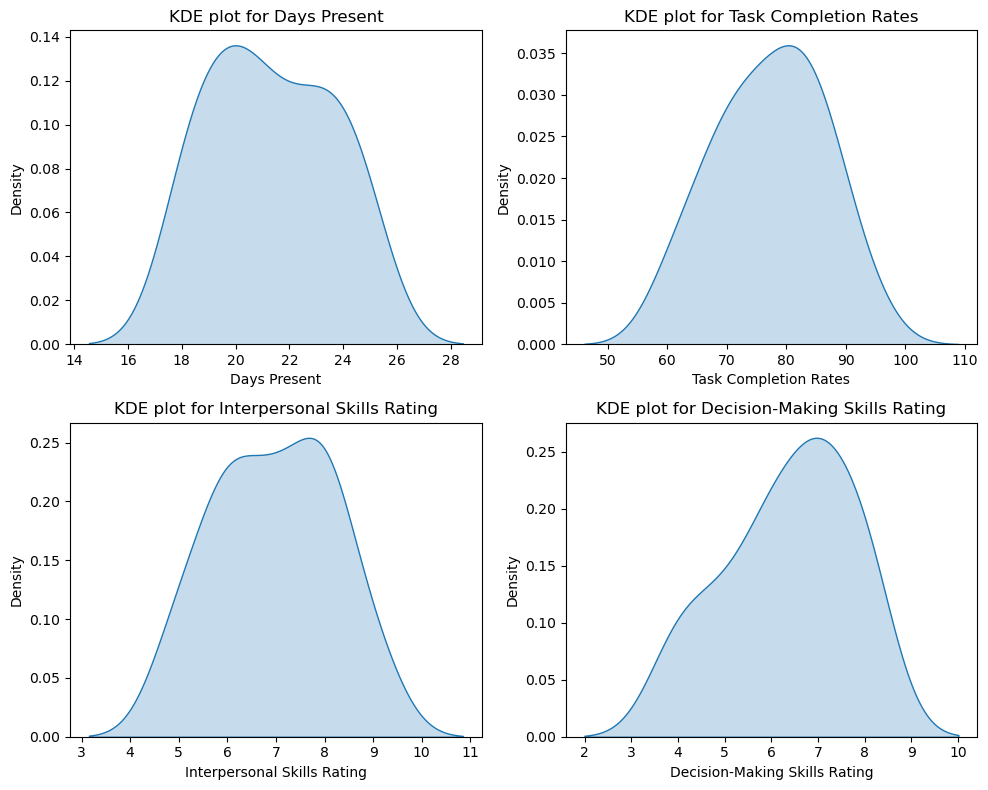

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['Days Present','Task Completion Rates','Interpersonal Skills Rating','Decision-Making Skills Rating']  # Example column names
num_row, num_col = 2, 2  # Adjust based on number of plots

fig, axes = plt.subplots(num_row, num_col, figsize=(10, 8))  # Set appropriate figure size

# Flatten axes for easy iteration if needed
axes = axes.flatten()

for index, column in enumerate(numeric_columns):
    sns.kdeplot(df[column], ax=axes[index],fill=True)
    axes[index].set_title(f'KDE plot for {column}')  # Dynamic titles

plt.tight_layout()
plt.show()

In [45]:
from scipy.stats import shapiro
import pandas as pd
numeric_columns =['Days Present','Task Completion Rates','Interpersonal Skills Rating','Decision-Making Skills Rating','Sales Revenue Generated']  # Selecting numerical columns
shapiro_results = {}

for column in numeric_columns:
    stat, p_value = shapiro(df[column])  # Perform Shapiro-Wilk test
    shapiro_results[column] = round(p_value, 3)  # Store rounded p-values

print(shapiro_results)  # Output results

{'Days Present': 0.044, 'Task Completion Rates': 0.321, 'Interpersonal Skills Rating': 0.015, 'Decision-Making Skills Rating': 0.004, 'Sales Revenue Generated': 0.12}


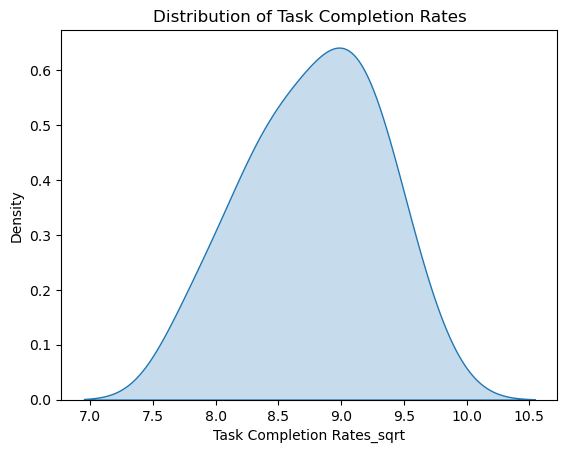

Axes(0.125,0.11;0.775x0.77)
p-value: 0.26458350826238264


In [29]:
from scipy.stats import shapiro
def sqrt_transformation(df, column_name):
    df[f'{column_name}_sqrt'] = np.sqrt(df[column_name])
    stat, p_value = shapiro(df[f'{column_name}_sqrt'])
    distribution = sns.kdeplot(df[f'{column_name}_sqrt'], fill=True)
    plt.title('Distribution of Task Completion Rates')
    plt.show()
    return distribution, p_value

# Call the function
distribution, p_value = sqrt_transformation(df, 'Task Completion Rates')
print(distribution)
print('p-value:',p_value)
 


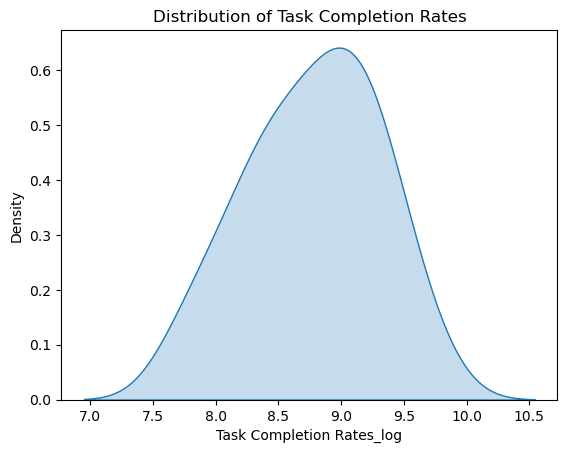

Axes(0.125,0.11;0.775x0.77)
p-value: 0.26458350826238264


In [33]:
def log_transformation(df, column_name):
    df[f'{column_name}_log'] = np.sqrt(df[column_name])
    stat, p_value = shapiro(df[f'{column_name}_log'])
    distribution = sns.kdeplot(df[f'{column_name}_log'], fill=True)
    plt.title('Distribution of Task Completion Rates')
    plt.show()
    return distribution, p_value

# Call the function
distribution, p_value = log_transformation(df, 'Task Completion Rates')
print(distribution)
print('p-value:',p_value)

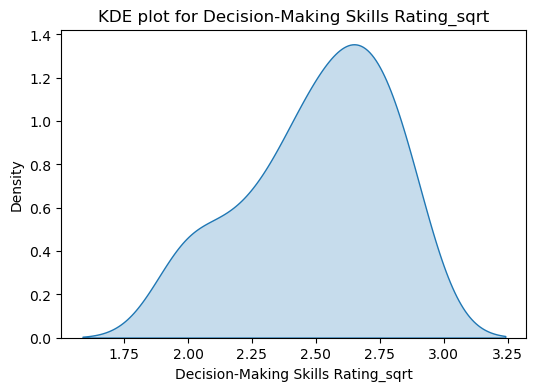

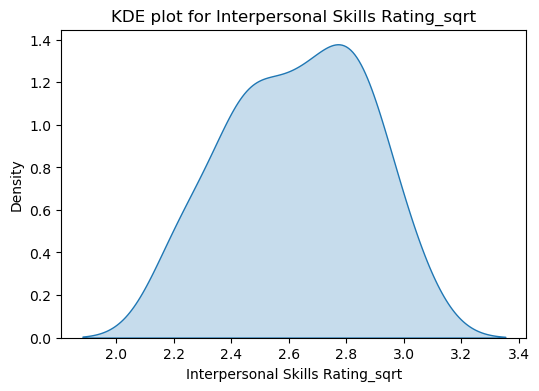

In [39]:
from scipy.stats import shapiro

# Function to apply square root transformation
def sqrt_transformation(df, column_name):
    df[f'{column_name}_sqrt'] = np.sqrt(df[column_name])  # Apply transformation
    
    # Perform Shapiro-Wilk test
    stat, p_value = shapiro(df[f'{column_name}_sqrt'])
    
    # Plot KDE for transformed data
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[f'{column_name}_sqrt'], fill=True)
    plt.title(f'KDE plot for {column_name}_sqrt')
    plt.xlabel(f'{column_name}_sqrt')
    plt.show()
sqrt_transformation(df, 'Decision-Making Skills Rating')
sqrt_transformation(df, 'Interpersonal Skills Rating')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df2=pd.read_excel("practice_data.xlsx")
df2.head()

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes


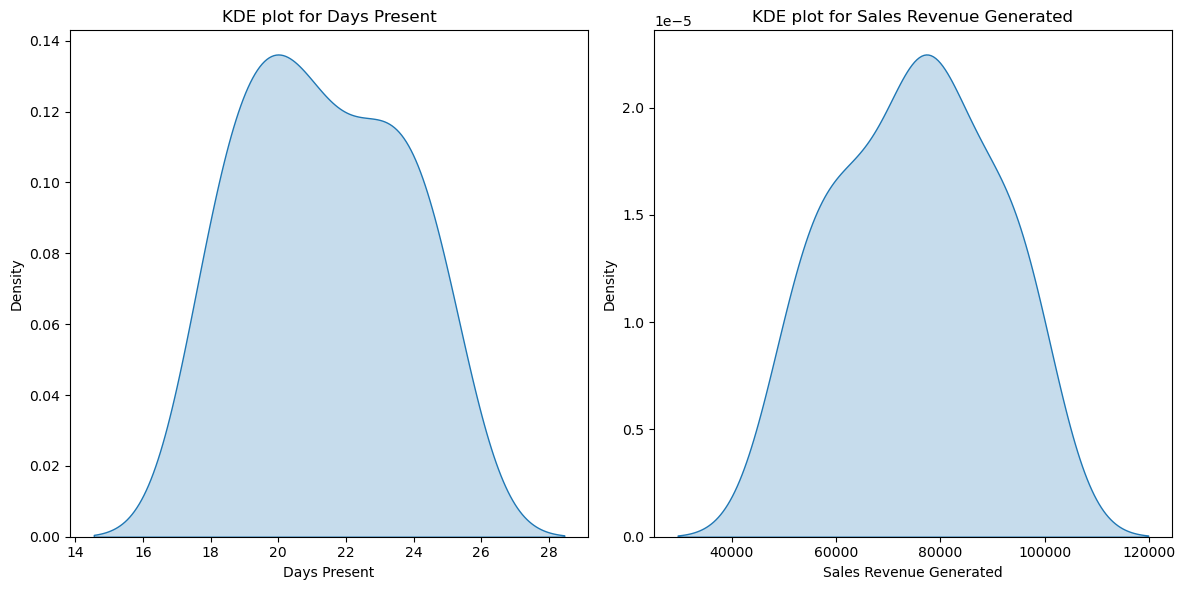

In [14]:
numeric_columns = ['Days Present','Sales Revenue Generated']  # Example column names
num_row, num_col = 1, 2  # Adjust based on number of plots

fig, axes = plt.subplots(num_row, num_col, figsize=(12,6))  # Set appropriate figure size

# Flatten axes for easy iteration if needed
axes = axes.flatten()

for index, column in enumerate(numeric_columns):
    sns.kdeplot(df2[column], ax=axes[index],fill=True)
    axes[index].set_title(f'KDE plot for {column}')  # Dynamic titles

plt.tight_layout()
plt.show()

In [16]:
range_value=df2['Sales Revenue Generated'].max()
print(f"Highest Sales Revenue:{range_value}")

Highest Sales Revenue:97797


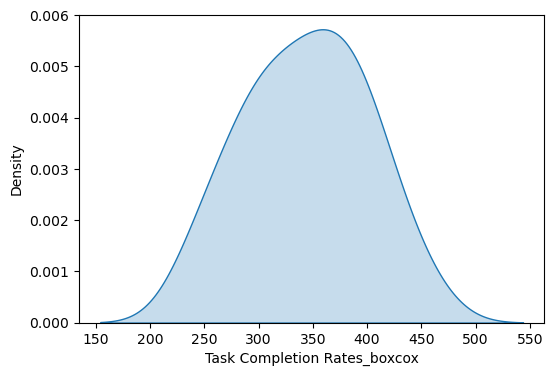

Shapiro-Wilk Test p-value: 0.347


In [88]:
def boxcox_transformation(df2, column_name):
    # Apply Box-Cox transformation (add 1 to avoid zero values)
    transformed_data, _ = boxcox(df2[column_name] + 1)

    # Store transformed values in the dataframe
    df2[f'{column_name}_boxcox'] = transformed_data
    
    # Perform Shapiro-Wilk test for normality
    stat, p_value = shapiro(df2[f'{column_name}_boxcox'])
    
    # Plot KDE for transformed data
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df2[f'{column_name}_boxcox'], fill=True)  # Correct way to display plots
    plt.show()
    print(f'Shapiro-Wilk Test p-value: {p_value:.3f}')

    

# Apply transformation to Task Completion Rates
boxcox_transformation(df2, 'Task Completion Rates')


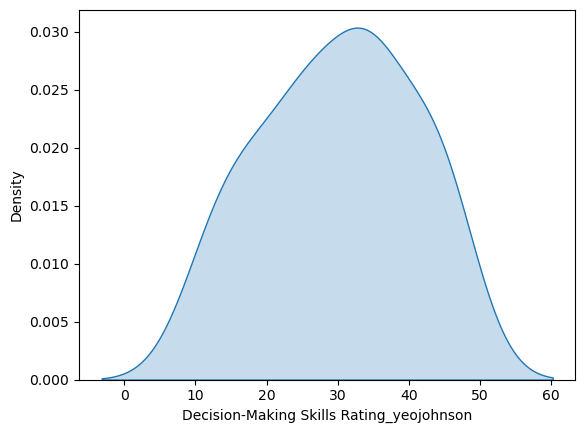

Shapiro-Wilk Test p-value: 0.006


In [92]:
from scipy.stats import yeojohnson
def yeojohnson_transformation(df2, column_name):
 transformed_data, _ = yeojohnson(df2[column_name])
 df2[f'{column_name}_yeojohnson'] = transformed_data
 stat, p_value = shapiro(df2[f'{column_name}_yeojohnson'])
 kdeplot = sns.kdeplot(df2[f'{column_name}_yeojohnson'],fill=True)
 plt.show()
 print(f'Shapiro-Wilk Test p-value: {p_value:.3f}')   
 
yeojohnson_transformation(df2,'Decision-Making Skills Rating')

In [104]:
from scipy import stats
hypothesis_mean=68
t_statistic, p_value = stats.ttest_1samp(df2['Task Completion Rates'], hypothesis_mean)
print("P-value:", p_value)
alpha=0.05
if p_value < alpha:
     print("Reject the null hypothesis. There is a significant difference between the average purchase amount and 68.")
else:
     print("Fail to reject the null hypothesis. There is no significant difference between the average purchase amount and 68.")

P-value: 4.285575154114236e-06
Reject the null hypothesis. There is a significant difference between the average purchase amount and 68.


In [129]:
 from scipy import stats
 churned = df2.query('churned == "Yes"')['Sales Revenue Generated']
 existing = df2.query('churned == "No"')['Sales Revenue Generated']
 t_statistic, p_value = stats.ttest_ind(churned, existing)
 print("P-value:", p_value)
 alpha = 0.05 
if p_value < alpha:
     print("Reject the null hypothesis. There is a significant difference in average purchase amount between churned and existing customers.")
else:
     print("Fail to reject the null hypothesis. There is no significant difference in average purchase amount between churned and existing customers.")


P-value: 0.5653556952507652
Fail to reject the null hypothesis. There is no significant difference in average purchase amount between churned and existing customers.


In [135]:
from scipy import stats
High = df2.query('`Accuracy of Work` == "High"')['Task Completion Rates']
Medium = df2.query('`Accuracy of Work` == "Medium"')['Task Completion Rates']
Low = df2.query('`Accuracy of Work` == "Low"')['Task Completion Rates']
t_statistic, p_value = stats.f_oneway(High,Medium,Low)
print("P-value:", p_value)
alpha = 0.05 
if p_value < alpha:
     print("Reject the null hypothesis. There is a significant difference in average frequency of purchases among the customers from different cities.")
else:
     print("Fail to reject the null hypothesis. There is no significant difference in average frequency of purchases among the customers from different cities.")


P-value: 9.019029484966771e-06
Reject the null hypothesis. There is a significant difference in average frequency of purchases among the customers from different cities.


In [123]:
import pandas as pd
from scipy import stats

# Sample dataset for demonstration
data = pd.DataFrame({
    'City': ['Chicago', 'New York', 'Houston', 'Los Angeles'] * 5,
    'Frequency_of_Purchases': [10, 12, 9, 15, 11, 13, 8, 14, 9, 12, 7, 13, 10, 12, 9, 16, 11, 15, 7, 18]
})

# Filter data for each city
Chicago = data.query('City == "Chicago"')['Frequency_of_Purchases']
New_York = data.query('City == "New York"')['Frequency_of_Purchases']
Houston = data.query('City == "Houston"')['Frequency_of_Purchases']
Los_Angeles = data.query('City == "Los Angeles"')['Frequency_of_Purchases']

# Perform One-Way ANOVA
t_statistic, p_value = stats.f_oneway(Chicago, New_York, Houston, Los_Angeles)

# Output results
print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation:
alpha = 0.05 
if p_value < alpha:
     print("Reject the null hypothesis. There is a significant difference in average frequency of purchases among the customers from different cities.")
else:
     print("Fail to reject the null hypothesis. There is no significant difference in average frequency of purchases among the customers from different cities.")

T-statistic: 27.521
P-value: 0.000
Reject the null hypothesis. There is a significant difference in average frequency of purchases among the customers from different cities.
